# AI & DL

## Лабораторная работа №1

Набор данных - [Steel Industry Energy Consumption](https://www.kaggle.com/datasets/csafrit2/steel-industry-energy-consumption)

### Обработка входных данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Вспомогательная функция для построения гистограмм

In [2]:
def gist(ds, n, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize = (20, 10))
    fig.suptitle("Распределения числовых признаков")
    for i in range(n):
        sns.histplot(ds[ds.columns[i]], ax = ax[i // cols][i % cols], kde = True)
    pass

In [3]:
ds = pd.read_csv("../data/Steel_industry_data.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

Переименую столбцы для лучшего восприятия таблицы

In [4]:
ds = ds.rename(columns = {
    "Lagging_Current_Reactive.Power_kVarh" : "LagCRP",
    "Leading_Current_Reactive_Power_kVarh" : "LeaCRP",
    "Lagging_Current_Power_Factor" : "LagCPF",
    "Leading_Current_Power_Factor" : "LeaCPF",
    "Day_of_week" : "Day"
})
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        35040 non-null  object 
 1   Usage_kWh   35040 non-null  float64
 2   LagCRP      35040 non-null  float64
 3   LeaCRP      35040 non-null  float64
 4   CO2(tCO2)   35040 non-null  float64
 5   LagCPF      35040 non-null  float64
 6   LeaCPF      35040 non-null  float64
 7   NSM         35040 non-null  int64  
 8   WeekStatus  35040 non-null  object 
 9   Day         35040 non-null  object 
 10  Load_Type   35040 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.9+ MB


Убираю столбец с датой и временем

In [5]:
ds = ds.drop("date", axis = "columns")

Пример данных

In [6]:
ds.head()

,Usage_kWh,LagCRP,LeaCRP,CO2(tCO2),LagCPF,LeaCPF,NSM,WeekStatus,Day,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [7]:
ds.isna().sum()

Usage_kWh     0
LagCRP        0
LeaCRP        0
CO2(tCO2)     0
LagCPF        0
LeaCPF        0
NSM           0
WeekStatus    0
Day           0
Load_Type     0
dtype: int64

Пропусков нет, обработка не требуется

In [8]:
# ds = ds.dropna()

Парные графики числовых признаков

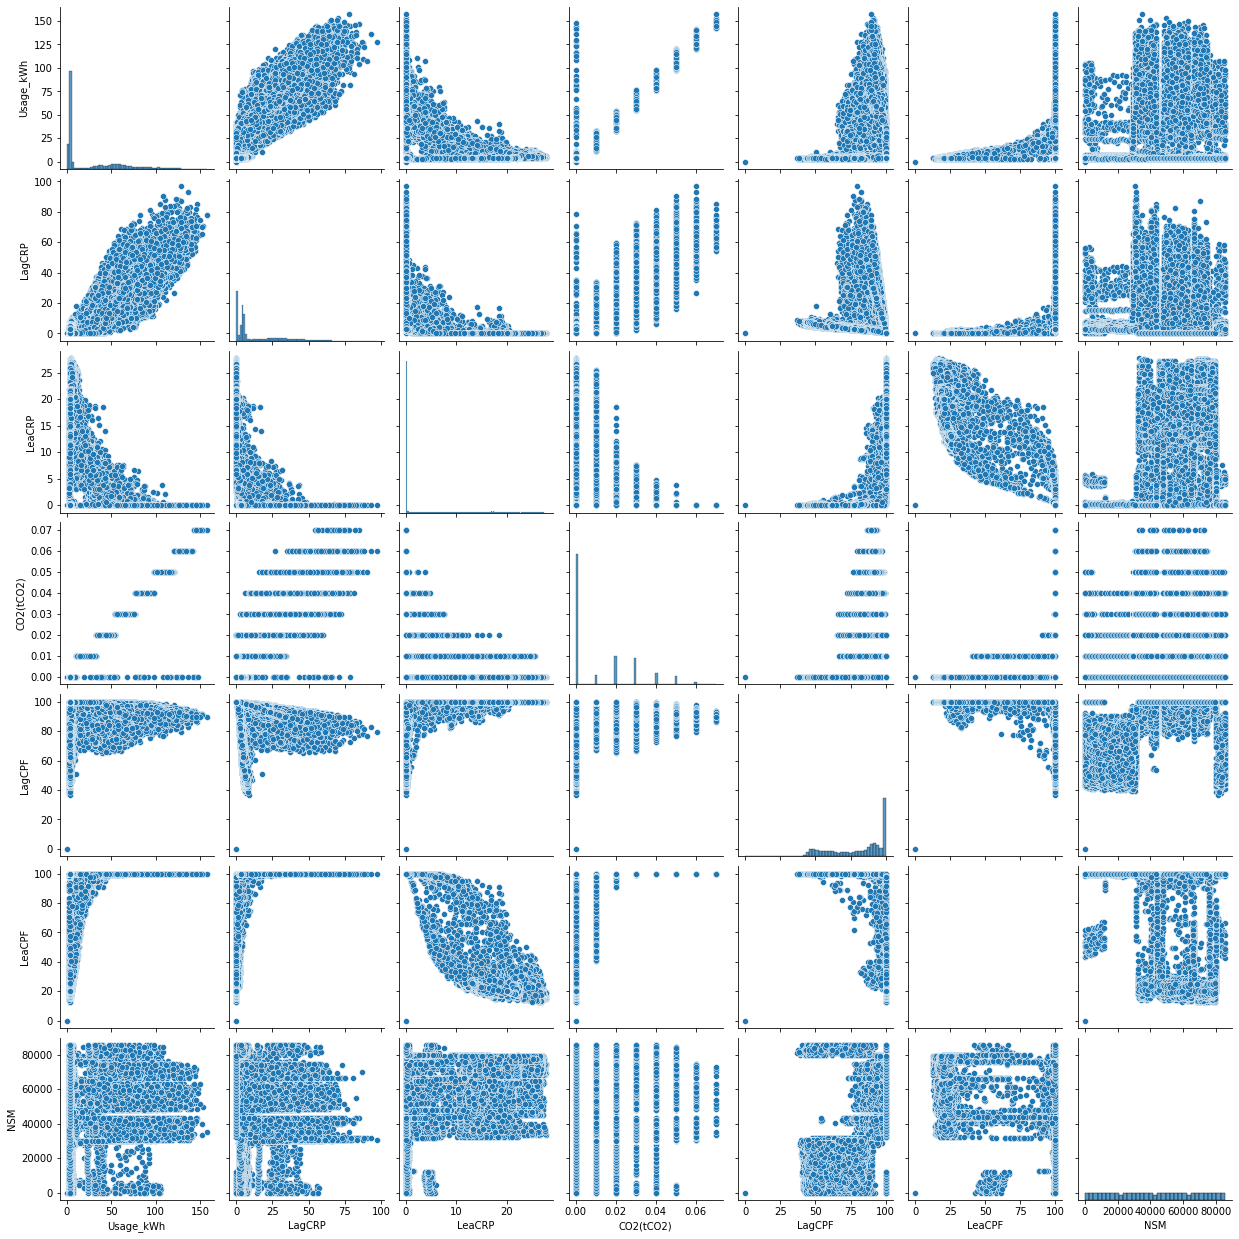

In [9]:
sns.pairplot(data = ds)
pass

**Видно, что Usage_kWh образует облако вместе с LagCRP. Есть потенциал на высокую точность модели!**

One-Hot Encoding категориальных признаков

In [10]:
ds_Day = pd.get_dummies(ds.Day)
ds_Load_Type = pd.get_dummies(ds.Load_Type)

ds_categorical = pd.concat([ds_Day, ds_Load_Type], axis = "columns")
ds_categorical.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Load,Maximum_Load,Medium_Load
0,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0


Заменяю категориальные признаки числовыми

In [11]:
ds["WeekStatus"].replace(["Weekday", "Weekend"],
                         [0, 1], inplace = True)
ds = ds.drop("Day", axis = "columns")
ds = ds.drop("Load_Type", axis = "columns")

ds = pd.concat([ds, ds_categorical], axis = "columns")
ds.head()

,Usage_kWh,LagCRP,LeaCRP,CO2(tCO2),LagCPF,LeaCPF,NSM,WeekStatus,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Load,Maximum_Load,Medium_Load
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,0,1,0,0,0,0,0,1,0,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,0,1,0,0,0,0,0,1,0,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,0,1,0,0,0,0,0,1,0,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,0,1,0,0,0,0,0,1,0,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,0,1,0,0,0,0,0,1,0,0


Матрица корреляции признаков

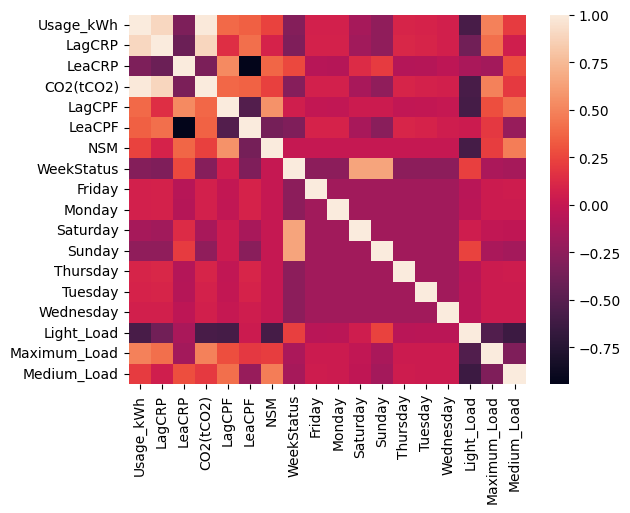

In [12]:
sns.heatmap(ds.corr())
pass

**Полной корреляции нет, удаление признаков не требуется**

Гистограммы числовых признаков

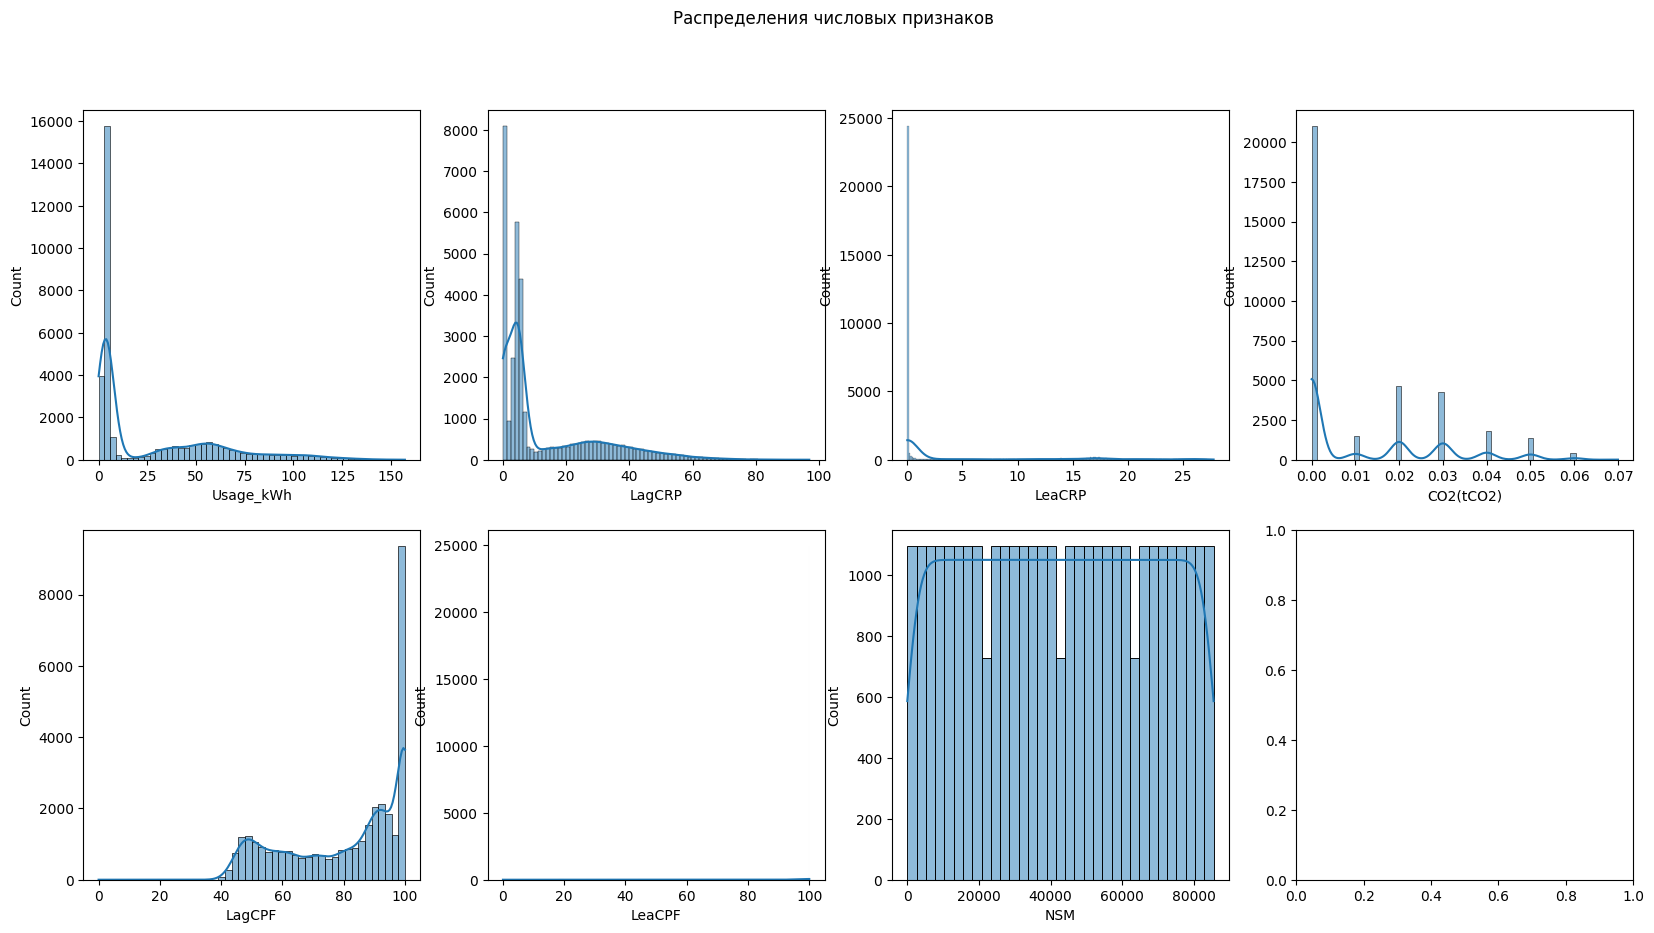

In [13]:
gist(ds, 7, 2, 4)

Видно, что в LeaCRP и LeaCPF есть что-то похожее на выбросы. Попытка удалить эти данные влечёт появление подобной картины для LagCPF и LagCRP, это значит, что данные не содержат большого числа явных выбросов, дальнейшая обработка данных не требуется.

**Данные подготовлены для обучения модели**

### Обучение модели

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

Функция для вывода результатов обучения

In [15]:
def scores(model, X, y):
    print("Лучшие гиперпараметры модели:", model.best_params_)
    print("Лучший счёт модели:", model.best_score_)
    pred = model.best_estimator_.predict(X)
    print("Метрика MSE:", mean_squared_error(y, pred))
    print("Метрика MAE:", mean_absolute_error(y, pred))

Разбиваю данные на признаки и то, что требуется предсказать

In [16]:
X = ds.drop("Usage_kWh", axis = 1).to_numpy()
y = ds["Usage_kWh"].to_numpy()

print("Размерность входных данных:", X.shape)
print("Размерность выходных данных:", y.shape)

Размерность входных данных: (35040, 17)
Размерность выходных данных: (35040,)


Разбиваю на обучающую и тестовую выборку

In [17]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 1, shuffle = True)

print("Размерность тренировочных входных данных:", train_X.shape)
print("Размерность тренировочных выходных данных:", train_y.shape)

print("Размерность тестовых входных данных:", test_X.shape)
print("Размерность тестовых выходных данных:", test_y.shape)

Размерность тренировочных входных данных: (28032, 17)
Размерность тренировочных выходных данных: (28032,)
Размерность тестовых входных данных: (7008, 17)
Размерность тестовых выходных данных: (7008,)


Буду использовать RandomizedSearchCV, так как подбор параметров с помощью GridSearchCV довольно долгий

Дерево принятия решений - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [18]:
dcr_model = RandomizedSearchCV(Pipeline([("dcr", DecisionTreeRegressor())]),
                    {"dcr__criterion" : ["squared_error", "friedman_mse", "poisson"],
                     "dcr__splitter" : ["best", "random"],
                     "dcr__max_depth" : [8, 16, 32],
                     "dcr__min_samples_split" : [50, 100, 200]})
dcr_model.fit(train_X, train_y)
scores(dcr_model, test_X, test_y)

Лучшие гиперпараметры модели: {'dcr__splitter': 'best', 'dcr__min_samples_split': 50, 'dcr__max_depth': 16, 'dcr__criterion': 'poisson'}
Лучший счёт модели: 0.9946880207179511
Метрика MSE: 4.188159161243413
Метрика MAE: 0.9404081282969136


Случайный лес - [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [19]:
rfr_model = RandomizedSearchCV(Pipeline([("rfr", RandomForestRegressor())]),
                    {"rfr__n_estimators" : [25, 50, 100],
                     "rfr__criterion" : ["squared_error", "friedman_mse", "poisson"],
                     "rfr__max_depth" : [2, 3, 4]})
rfr_model.fit(train_X, train_y)
scores(rfr_model, test_X, test_y)

Лучшие гиперпараметры модели: {'rfr__n_estimators': 25, 'rfr__max_depth': 4, 'rfr__criterion': 'squared_error'}
Лучший счёт модели: 0.9866902815030422
Метрика MSE: 14.318521542458882
Метрика MAE: 2.3539233829578476


Обе модели показывают низкую СК-ошибку. Отклонение в $10$-$15$ кВт\*ч при потреблении заводом порядка $10^4$ кВт\*ч это незначительно